<a href="https://colab.research.google.com/github/Leostark95/IMC_Pareto/blob/main/IMC_Pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color='056938'> Importar Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# <font color='056938'> Cargar la Base de Datos

In [3]:
pareto = pd.read_csv('https://raw.githubusercontent.com/Leostark95/IMC_Pareto/main/RegistroPQRS.csv', sep = ';')
pareto

,Fecha,N° factura,Cliente,Ciudad,Vendedor,Localización,Detalle de la inconsistencia,Cantidad,Área responsable,Solución
0,31/01/2023,6447.0,Nestor Zuluaga Gomez,Cali,NaN,MB,Pedido incompleto,6,NaN,Nota crédito
1,30/10/2023,4382.0,Gloria Gonzalez,Cali,Katerin Vanegas,MB,No llegó el pedido,3,NaN,Nota crédito
2,29/11/2023,5813.0,Nestor Zuluaga Gomez,Cali,Katerin Vanegas,MB,Avería,17,NaN,Nota crédito
3,11/12/2023,5813.0,Néstor Zuluaga Gómez,Cali,Sulmi Ruíz,MB,No llegó el pedido,12,NC-2-354,NaN
4,19/12/2023,6039.0,Papelería Universal,Cali,Katerin Vanegas,MB,No llegó el pedido,36,NaN,Nota crédito
...,...,...,...,...,...,...,...,...,...,...
123,24/06/2024,7371.0,Ramírez Moreno y Asociado,Itagüí,Andrea Herrera,MB,Otro motivo,1,NC-2-534,NaN
124,24/06/2024,7576.0,Ricardo Alberto Otálvaro,Copacabana,Andrea Herrera,MB,Exceso de pedido,4,NC-2-535,NaN
125,3/09/2024,NaN,Hermes Milton,Florida,Sulmi Ruíz,MB,Error de envío,16,NC-2-472,NaN
126,NaN,NaN,Gonzalez Ensuncho SAS,Cartagena,Cindy Quinto,MB,Devolución,61,NaN,NaN


# <font color='056938'> Cambiar nombres de columnas

In [4]:
pareto.rename(columns={
    'Detalle de la inconsistencia': 'Detalle_de_la_inconsistencia',
    'N° factura': 'Factura',
    'Área responsable': 'Responsable'
}, inplace=True)

# <font color='056938'> Información de la base de datos

In [5]:
pareto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Fecha                         126 non-null    object 
 1   Factura                       116 non-null    float64
 2   Cliente                       124 non-null    object 
 3   Ciudad                        122 non-null    object 
 4   Vendedor                      124 non-null    object 
 5   Localización                  126 non-null    object 
 6   Detalle_de_la_inconsistencia  128 non-null    object 
 7   Cantidad                      128 non-null    int64  
 8   Responsable                   51 non-null     object 
 9   Solución                      42 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 10.1+ KB


# <font color='157699'> Creación de Frecuencia

In [6]:
frec = pd.value_counts(pareto['Detalle_de_la_inconsistencia'])
frec

<ipython-input-6-08bf5a5b8cf7>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frec = pd.value_counts(pareto['Detalle_de_la_inconsistencia'])


,count
Detalle_de_la_inconsistencia,
Avería,24
Pedido incompleto,18
Expectativas no cumplidas por el producto,16
Error de envío,15
Defectos en el contenido,11
Error de facturación,9
No llegó el pedido,8
Devolución,7
Exceso de pedido,5


## <font color='157699'> Creación Tabla de Frecuencia Acumulada

In [7]:
frec_pareto = pd.DataFrame(frec)

# Asignamos el nombre Frec_abs a la columna
frec_pareto.columns = ['Frec_abs']
frec_pareto

,Frec_abs
Detalle_de_la_inconsistencia,
Avería,24
Pedido incompleto,18
Expectativas no cumplidas por el producto,16
Error de envío,15
Defectos en el contenido,11
Error de facturación,9
No llegó el pedido,8
Devolución,7
Exceso de pedido,5


# <font color='157699'> Creación Tabla de Frecuencia Relativa

In [8]:
frec_pareto['Frec_rel_%'] = 100*frec_pareto['Frec_abs']/len(pareto['Detalle_de_la_inconsistencia'])
frec_pareto

,Frec_abs,Frec_rel_%
Detalle_de_la_inconsistencia,,
Avería,24,18.75000
Pedido incompleto,18,14.06250
Expectativas no cumplidas por el producto,16,12.50000
Error de envío,15,11.71875
Defectos en el contenido,11,8.59375
Error de facturación,9,7.03125
No llegó el pedido,8,6.25000
Devolución,7,5.46875
Exceso de pedido,5,3.90625


# <font color='157699'> Creación Tabla de Frecuencia Relativa Acumulada

In [9]:
# Obtener los nombres de las Frecuencias Absolutas
Frec_rel_val = frec_pareto['Frec_rel_%'].values

# Crear una lista vacía en donde se registran las frecuencias absolutas acumuladas
acum = []

# Iniial una variable en la que se guardarán los valores anteriores
valor_acum = 0

# Recorremos la lista con las frecuencias absolutas para irlas sumando
for i in Frec_rel_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

frec_pareto['Frec_rel_%_acum'] = acum
frec_pareto

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
Detalle_de_la_inconsistencia,,,
Avería,24,18.75000,18.75000
Pedido incompleto,18,14.06250,32.81250
Expectativas no cumplidas por el producto,16,12.50000,45.31250
Error de envío,15,11.71875,57.03125
Defectos en el contenido,11,8.59375,65.62500
Error de facturación,9,7.03125,72.65625
No llegó el pedido,8,6.25000,78.90625
Devolución,7,5.46875,84.37500
Exceso de pedido,5,3.90625,88.28125


# <font color='157699'> Creación Diagrama de Pareto según PQRS

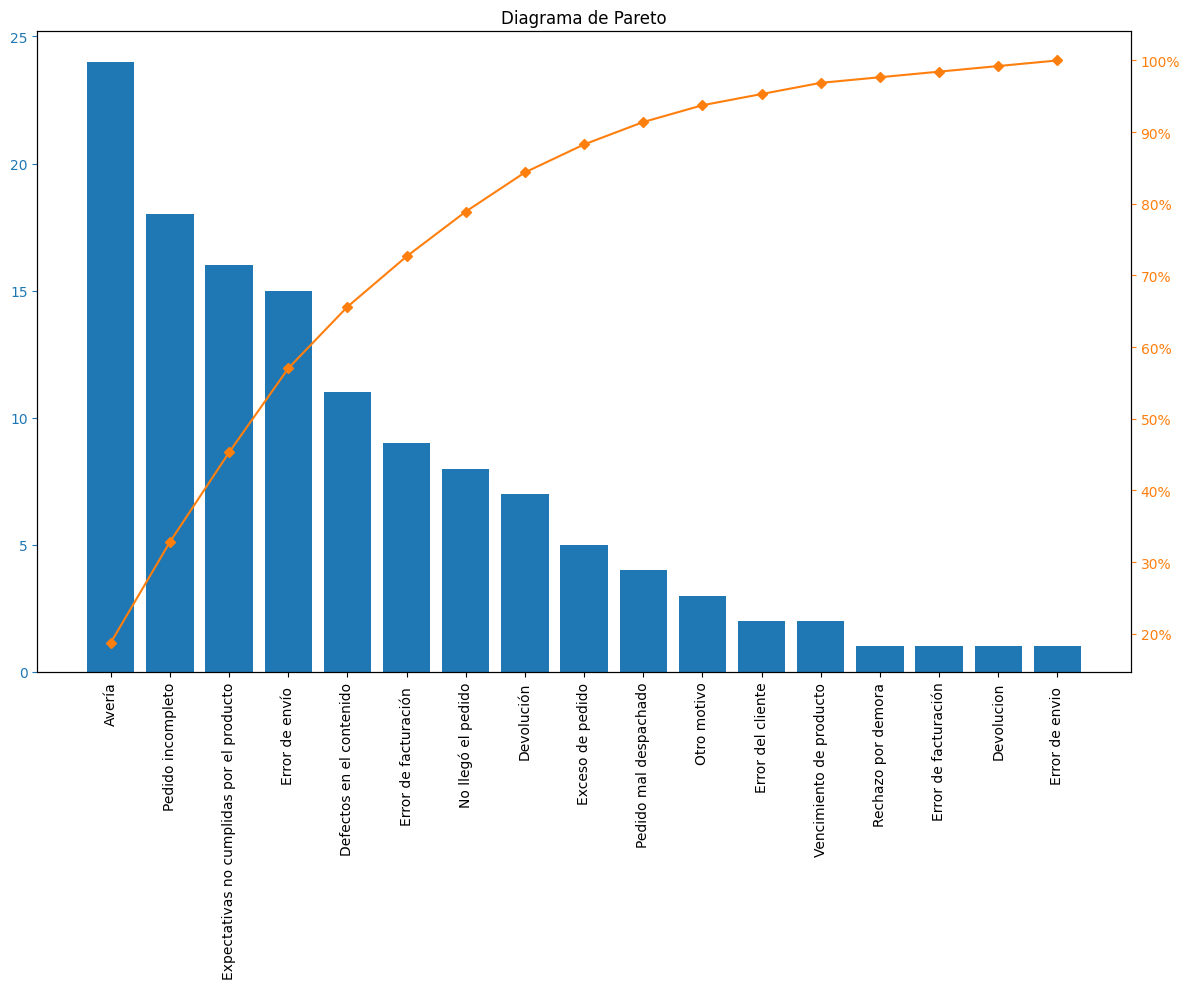

In [10]:
# para el gráfico, ajustamos el tamaño con figsize
fig = plt.figure(figsize=(12, 10))  # Aseguramos el tamaño correcto

# Agregamos el eje al gráfico
ax = fig.add_subplot(1,1,1)

# título del gráfico
ax.set_title('Diagrama de Pareto')

# Gráfico de barras con las Frecuencias Absolutas
ax.bar(frec_pareto.index, frec_pareto['Frec_abs'], color = 'C0')

# Graficamos los valores de la Frecuencia Relativa Acumulada
ax2 = ax.twinx() # Nuevo eje a graficar
ax2.plot(frec_pareto.index, frec_pareto['Frec_rel_%_acum'], color = 'C1', marker = 'D', ms = 5)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Asignamos un color para las etiquetas de los ejes 'y'
ax.tick_params(axis = 'y', colors = 'C0')
ax2.tick_params(axis = 'y', colors = 'C1')

# Definir las posiciones en el eje x antes de asignar etiquetas
ax.set_xticks(range(len(frec_pareto.index)))  # Establecemos las posiciones de las marcas en el eje x
ax.set_xticklabels(frec_pareto.index, rotation=90)  # Asignamos las etiquetas con rotación de 90 grados

# Mostramos el gráfico
plt.tight_layout()  # Ajustamos el diseño para evitar que se corten etiquetas
plt.show()  # Este comando muestra el gráfico correctamente


El diagrama de Pareto muestra la distribución de las quejas y reclamos (PQRS) que hacen los clientes de la empresa M'Bell con respecto a las devoluciones de lotes y productos.

### 1. **Interpretación General**
   El gráfico de barras (en azul) representa las diferentes causas de las PQRS, ordenadas de mayor a menor frecuencia. El eje Y izquierdo muestra la cantidad de ocurrencias para cada causa. La curva naranja superpuesta corresponde al porcentaje acumulado de las causas en función del total de PQRS, con el eje Y derecho indicando el porcentaje.

### 2. **Ley de Pareto (80/20)**
   - **Ley de Pareto**: Según esta ley, aproximadamente el 80% de los problemas son causados por el 20% de las causas. El gráfico ayuda a visualizar cómo una pequeña cantidad de causas contribuyen a la mayoría de los problemas.
   - En este caso, parece que las primeras 4 causas (Avería, Pedido incompleto, Expectativas no cumplidas por el producto, Error de envío) son responsables de alrededor del **80% de las PQRS**, como se refleja en la curva naranja que alcanza ese porcentaje, incluso, en aproxu¿imadamente la quinta categoría.

### 3. **Causas Principales**
   - **Avería** es la causa más frecuente de las devoluciones, con más de 20 ocurrencias.
   - **Pedido incompleto** y **Expectativas no cumplidas por el producto** siguen de cerca, con entre 16 y 18 quejas cada una.
   - Las siguientes causas incluyen **Error de envío** y **Defectos en el contenido**, que también contribuyen de manera significativa.

   Estas cinco primeras causas representan una parte considerable del total de PQRS, lo que indica que la empresa debería centrarse en resolver estos problemas prioritarios para mejorar significativamente la satisfacción del cliente.

### 4. **Causas Menores**
   - Las últimas causas en el gráfico, como **Vencimiento de producto**, **Rechazo por demora**, **Error de facturación**, y **Error del cliente**, tienen una baja incidencia (alrededor de 2 a 5 ocurrencias cada una).
   - Aunque estas causas contribuyen menos a las PQRS, no deben ser ignoradas por completo, ya que podrían señalar problemas de nicho que, si se resuelven, podrían mejorar la imagen de la empresa en segmentos específicos de su base de clientes.

### 5. **Acciones Recomendadas**
   - **Avería**: La empresa debe investigar las causas de las averías, que podrían ser producto de fallos en la fabricación o en el transporte. Implementar mejores prácticas de manejo, o mejorar la calidad del empaque, podría reducir significativamente este problema.
   - **Pedido incompleto** y **Expectativas no cumplidas**: Mejorar los controles de inventario y el proceso de verificación antes de despachar los productos podría reducir las incidencias de pedidos incompletos.
   - **Error de envío y defectos en el contenido**: La empresa podría implementar sistemas más automatizados de control de calidad y mejorar los procedimientos de envío.

### 6. **Conclusión**
   El análisis del diagrama de Pareto revela que la empresa M'Bell debe enfocarse en las primeras cinco causas de las PQRS para lograr un impacto significativo en la reducción de quejas. Aplicar estrategias correctivas en estas áreas clave podría eliminar aproximadamente el 80% de los problemas actuales. A medida que se logre una mejora en estas áreas, la empresa podría revisar las causas menores para alcanzar una optimización más completa.

Este enfoque permitirá a la empresa mejorar la eficiencia y la satisfacción del cliente de manera escalonada, abordando los problemas más críticos primero.